# ***Data Processing***

V. 1.00

In [1]:
# imports and setup 
import pandas as pd
import scipy as sc
import numpy as np
import seaborn as sns
import re
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [9]:
movies = pd.DataFrame(pd.read_csv("movies.csv"))
movies = movies.drop(['Unnamed: 0'], axis=1)

movies.loc[movies["Year"] == '    ', ['Year']] = 0 
movies["Year"] = movies["Year"].fillna(-1)
movies["Year"] = movies["Year"].astype(float)

movies = movies[~movies['Budget'].astype(str).str.contains('Budget:')]
movies = movies[~movies['Budget'].astype(str).str.contains('Trivia')]
movies["Budget"] = movies["Budget"].str.replace(',','')
movies["Budget"] = movies["Budget"].fillna(-1)
movies["Budget"] = movies["Budget"].astype(float)

movies["Gross US"] = movies["Gross US"].str.replace(',','')
movies["Gross US"] = movies["Gross US"].fillna(-1)
movies["Gross US"] = movies["Gross US"].astype(float)

movies["Gross WW"] = movies["Gross WW"].str.replace(',','')
movies["Gross WW"] = movies["Gross WW"].fillna(-1)
movies["Gross WW"] = movies["Gross WW"].astype(float)

movies["Language"] = movies["Language"].fillna(-1)

movies["Rating"] = movies["Rating"].fillna('Unrated')

movies["Duration"] = movies["Duration"].fillna(-1)
movies=movies.rename(columns = {'Duration':'Duration_Minutes'})

movies=movies.rename(columns = {'Average Rating':'Average_Rating'})
print(movies.dtypes)

Name                   object
Year                  float64
Genres                 object
Rating                 object
Duration_Minutes      float64
Actors                 object
Director               object
Average_Rating        float64
Budget                float64
Opening Weekend       float64
Gross US              float64
Gross WW              float64
Language               object
Production Company     object
dtype: object


Filling NA with median value

In [10]:
# def fill_nan(col):
#     movies[col] = movies[col].fillna(movies[col].median())

# cols = list(movies.columns)
# fill_nan(cols)

In [11]:
movies.columns

Index(['Name', 'Year', 'Genres', 'Rating', 'Duration_Minutes', 'Actors',
       'Director', 'Average_Rating', 'Budget', 'Opening Weekend', 'Gross US',
       'Gross WW', 'Language', 'Production Company'],
      dtype='object')

In [12]:
movies.head()

,Name,Year,Genres,Rating,Duration_Minutes,Actors,Director,Average_Rating,Budget,Opening Weekend,Gross US,Gross WW,Language,Production Company
0,Pulp Fiction,1994.0,"['Crime', 'Drama']",R,154.0,"['John Travolta', 'Uma Thurman', 'Samuel L. Ja...",['Quentin Tarantino'],8.9,8000000.0,9311882.0,107928762.0,213928762.0,"['English', 'Spanish', 'French']","['Miramax', 'ABandApart', 'JerseyFilms']"
1,The Amazing Spider-Man 2,2014.0,"['Action', 'Adventure', 'Sci-Fi']",PG-13,142.0,"['Andrew Garfield', 'Emma Stone', 'Jamie Foxx'...",['Marc Webb'],6.6,200000000.0,91608337.0,202853933.0,708982323.0,['English'],"['MarvelEnterprises', 'AviAradProductions', 'C..."
2,The Shawshank Redemption,1994.0,['Drama'],R,142.0,"['Tim Robbins', 'Morgan Freeman', 'Bob Gunton'...",['Frank Darabont'],9.3,25000000.0,727326.0,28341469.0,58500000.0,['English'],['CastleRockEntertainment']
3,Star Wars: Episode IV - A New Hope,1977.0,"['Action', 'Adventure', 'Fantasy', 'Sci-Fi']",PG,121.0,"['Mark Hamill', 'Harrison Ford', 'Carrie Fishe...",['George Lucas'],8.6,11000000.0,1554475.0,322740140.0,775398007.0,['English'],"['Lucasfilm', 'TwentiethCenturyFox']"
4,Back to the Future,1985.0,"['Adventure', 'Comedy', 'Sci-Fi']",PG,116.0,"['Michael J. Fox', 'Christopher Lloyd', 'Lea T...",['Robert Zemeckis'],8.5,19000000.0,11332134.0,210609762.0,381109762.0,['English'],"['UniversalPictures', 'AmblinEntertainment', '..."


In [13]:
# col = list(movies.describe().columns)
# sc = StandardScaler()
# temp = sc.fit_transform(movies[col])
# movies[col] = temp
# movies.head()

In [14]:
movies.isnull().sum()

Name                     0
Year                     0
Genres                   0
Rating                   0
Duration_Minutes         0
Actors                   0
Director                 0
Average_Rating           0
Budget                   0
Opening Weekend       4231
Gross US                 0
Gross WW                 0
Language                 0
Production Company       0
dtype: int64

In [15]:
to_drop = [2020,2021,2024] #Removing future releases (no data available)
movies=movies[~movies['Year'].isin(to_drop)] 

In [16]:
movies["Rating"].value_counts()

R            3974
PG-13        2020
PG           1570
Unrated       844
Not Rated     504
G             252
TV-14          91
TV-PG          71
TV-G           53
TV-MA          44
NC-17          20
X               8
TV-Y7           4
TV-Y            4
GP              1
Passed          1
Name: Rating, dtype: int64

In [17]:
drop_tv = ['TV-14' ,'TV-G', 'TV-MA', 'TV-Y', 'TV-PG' , 'TV-Y7' , 'GP' , 'Passed' , 'X' ]  #Removing TV shows/X rated movies
movies=movies[~movies['Rating'].isin(drop_tv)] 

In [18]:
# movies['Rating'] = np.where(movies['Rating'] == 'Not Rated', 'Unrated',0)

In [19]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9184 entries, 0 to 9836
Data columns (total 14 columns):
Name                  9184 non-null object
Year                  9184 non-null float64
Genres                9184 non-null object
Rating                9184 non-null object
Duration_Minutes      9184 non-null float64
Actors                9184 non-null object
Director              9184 non-null object
Average_Rating        9184 non-null float64
Budget                9184 non-null float64
Opening Weekend       5241 non-null float64
Gross US              9184 non-null float64
Gross WW              9184 non-null float64
Language              9184 non-null object
Production Company    9184 non-null object
dtypes: float64(7), object(7)
memory usage: 1.1+ MB


In [ ]:
import random
from wordcloud import WordCloud, STOPWORDS
text = (str(movies['Actors']))
plt.subplots(figsize=(20,15))
wordcloud = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='white',
                          width=1500,
                          height=1200
                         ).generate(text)


plt.imshow(wordcloud)
plt.title('Actors')
plt.axis('off')
plt.show()

In [ ]:
# movies["Genres"].value_counts()

In [ ]:
# seperate_genre='Action','Adventure','Animation','Biography','Comedy','Crime','Drama','Fantasy','Family','History','Horror','Music','Musical','Mystery','Romance','Sci-Fi','Sport','Thriller','War','Western'
# for genre in seperate_genre:
#     df = movies['Genres'].str.contains(genre).fillna(False)
#    # print('The total number of movies with ',Genres,'=',len(movies[df]))
#     f, ax = plt.subplots(figsize=(20, 20))
#     sns.countplot(x='Year', data=movies[df], palette="Greens_d");
#     plt.title(genre)
   

In [ ]:
# movies.Director.value_counts()[:10].plot.pie(autopct='%1.1f%%',figsize=(10,10))
# # plt.title('TOP 10 Directors OF MOVIES')

In [ ]:
# movies.Actors.value_counts()[:10].plot.pie(autopct='%1.1f%%',figsize=(10,10))
# plt.title('TOP 10 Actors OF MOVIES')

In [ ]:
movies["Year"].value_counts().to_frame()

In [ ]:
movies_09_19=movies[(2020 < movies['Year']) & (movies['Year'] > 2010)]

In [9]:
#top 10 rating movies 
Sortedrating= movies.sort_values(['Average_Rating'], ascending=False)
Sortedrating.head(10)

,Name,Year,Genres,Rating,Duration_Minutes,Actors,Director,Average_Rating,Budget,Opening Weekend,Gross US,Gross WW,Language,Production Company
9373,Game of Thrones,0.0,"['Action', 'Adventure', 'Drama', 'Fantasy', 'R...",TV-MA,57.0,"['Emilia Clarke', 'Peter Dinklage', 'Kit Harin...",[],9.5,-1.0,NaN,-1.0,-1.000000e+00,['English'],"['HomeBoxOffice(HBO)', 'Television360', 'Grok!..."
9029,Yanni Live! The Concert Event,2006.0,['Music'],Not Rated,82.0,"['Charlie Adams', 'Michelle Amato', 'Kristen A...","['George Veras', 'ProReviews', 'Excellent musi...",9.5,-1.0,NaN,-1.0,-1.000000e+00,['English'],[]
2,The Shawshank Redemption,1994.0,['Drama'],R,142.0,"['Tim Robbins', 'Morgan Freeman', 'Bob Gunton'...",['Frank Darabont'],9.3,25000000.0,727326.0,28341469.0,5.850000e+07,['English'],['CastleRockEntertainment']
194,The Godfather: Part II,1974.0,"['Crime', 'Drama']",R,202.0,"['Al Pacino', 'Robert De Niro', 'Robert Duvall...",['Francis Ford Coppola'],9.0,13000000.0,NaN,57300000.0,-1.000000e+00,"['English', 'Italian', 'Spanish', 'Latin', 'Si...","['ParamountPictures', 'TheCoppolaCompany']"
34,The Dark Knight,2008.0,"['Action', 'Crime', 'Drama', 'Thriller']",PG-13,152.0,"['Christian Bale', 'Heath Ledger', 'Aaron Eckh...",['Christopher Nolan'],9.0,185000000.0,158411483.0,534858444.0,1.004558e+09,"['English', 'Mandarin']","['WarnerBros.', 'LegendaryEntertainment', 'Syn..."
23,The Lord of the Rings: The Return of the King,2003.0,"['Adventure', 'Drama', 'Fantasy']",PG-13,201.0,"['Elijah Wood', 'Viggo Mortensen', 'Ian McKell...",['Peter Jackson'],8.9,94000000.0,72629713.0,377845905.0,1.119930e+09,"['English', 'Quenya', 'OldEnglish', 'Sindarin']","['NewLineCinema', 'WingNutFilms', 'TheSaulZaen..."
9253,Strangers: The Story of a Mother and Daughter,1979.0,"['Drama', 'actor']",Unrated,88.0,"['Bette Davis', 'Gena Rowlands', 'Ford Rainey'...",['Milton Katselas'],8.9,-1.0,NaN,-1.0,-1.000000e+00,['English'],['Chris/RoseProductions']
0,Pulp Fiction,1994.0,"['Crime', 'Drama']",R,154.0,"['John Travolta', 'Uma Thurman', 'Samuel L. Ja...",['Quentin Tarantino'],8.9,8000000.0,9311882.0,107928762.0,2.139288e+08,"['English', 'Spanish', 'French']","['Miramax', 'ABandApart', 'JerseyFilms']"
6611,Forrest Gump,1994.0,"['Drama', 'Romance']",PG-13,142.0,"['Tom Hanks', 'Robin Wright', 'Gary Sinise', '...",['Robert Zemeckis'],8.8,55000000.0,24450602.0,330252182.0,6.779454e+08,['English'],['ParamountPictures']
51,Inception,2010.0,"['Action', 'Adventure', 'Sci-Fi', 'Thriller']",PG-13,148.0,"['Leonardo DiCaprio', 'Joseph Gordon-Levitt', ...",['Christopher Nolan'],8.8,160000000.0,62785337.0,292576195.0,8.255328e+08,"['English', 'Japanese', 'French']","['WarnerBros.', 'LegendaryEntertainment', 'Syn..."


In [ ]:
# low rated movies
lowratedmovies= movies.query('(Average_Rating > 0) & (Average_Rating < 3.0)')
lowratedmovies.head()

In [ ]:
Sortedrevenue= movies.sort_values(['Budget'], ascending=False)

In [ ]:
#top 5 high revenue movies
Sortedrevenue.head()

In [ ]:
m= Sortedrevenue.query('(Budget > 500)')
print('number of movies with more than half million revenue:')
len(m)

In [ ]:
n= Sortedrevenue.query('(Budget < 500)')
print('number of movies with less than half million revenue:')
len(n)

In [ ]:
movies.info()

In [ ]:
from wordcloud import WordCloud, STOPWORDS
plt.subplots(figsize=(10,10))
text = (str(m['Actors']))
wordcloud = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='white',
                          width=1200,
                          height=1000
                         ).generate(text)


plt.imshow(wordcloud)
plt.title('ACTORS IN HIGH REVENUE MOVIES')
plt.axis('off')
plt.show()

In [ ]:
from wordcloud import WordCloud, STOPWORDS
plt.subplots(figsize=(10,10))
text = (str(n['Actors']))
wordcloud = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='white',
                          width=1200,
                          height=1000
                         ).generate(text)


plt.imshow(wordcloud)
plt.title('ACTORS IN LOW REVENUE MOVIES')
plt.axis('off')
plt.show()

In [8]:
numeric_features=movies._get_numeric_data().columns.values.tolist()
numeric_features

['Year',
 'Duration_Minutes',
 'Average_Rating',
 'Budget',
 'Opening Weekend',
 'Gross US',
 'Gross WW']

# Correlation heatmap

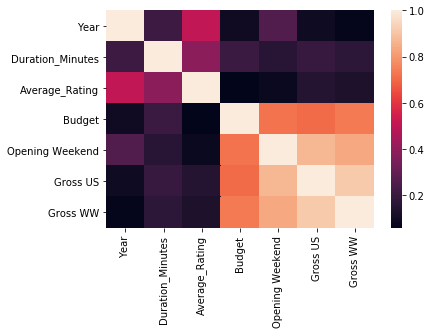

In [7]:
col = list(movies.describe().columns)
features=col
features
sns.heatmap(movies[features].corr())

In [11]:
movies.head()

,Name,Year,Genres,Rating,Duration_Minutes,Actors,Director,Average_Rating,Budget,Opening Weekend,Gross US,Gross WW,Language,Production Company
0,Pulp Fiction,1994.0,"['Crime', 'Drama']",R,154.0,"['John Travolta', 'Uma Thurman', 'Samuel L. Ja...",['Quentin Tarantino'],8.9,8000000.0,9311882.0,107928762.0,213928762.0,"['English', 'Spanish', 'French']","['Miramax', 'ABandApart', 'JerseyFilms']"
1,The Amazing Spider-Man 2,2014.0,"['Action', 'Adventure', 'Sci-Fi']",PG-13,142.0,"['Andrew Garfield', 'Emma Stone', 'Jamie Foxx'...",['Marc Webb'],6.6,200000000.0,91608337.0,202853933.0,708982323.0,['English'],"['MarvelEnterprises', 'AviAradProductions', 'C..."
2,The Shawshank Redemption,1994.0,['Drama'],R,142.0,"['Tim Robbins', 'Morgan Freeman', 'Bob Gunton'...",['Frank Darabont'],9.3,25000000.0,727326.0,28341469.0,58500000.0,['English'],['CastleRockEntertainment']
3,Star Wars: Episode IV - A New Hope,1977.0,"['Action', 'Adventure', 'Fantasy', 'Sci-Fi']",PG,121.0,"['Mark Hamill', 'Harrison Ford', 'Carrie Fishe...",['George Lucas'],8.6,11000000.0,1554475.0,322740140.0,775398007.0,['English'],"['Lucasfilm', 'TwentiethCenturyFox']"
4,Back to the Future,1985.0,"['Adventure', 'Comedy', 'Sci-Fi']",PG,116.0,"['Michael J. Fox', 'Christopher Lloyd', 'Lea T...",['Robert Zemeckis'],8.5,19000000.0,11332134.0,210609762.0,381109762.0,['English'],"['UniversalPictures', 'AmblinEntertainment', '..."


Dummy Encoding for Genres:

In [16]:
movies["Genres"] = movies["Genres"].str.replace('[','')
movies["Genres"] = movies["Genres"].str.replace(']','')
movies.head()

,Name,Year,Genres,Rating,Duration_Minutes,Actors,Director,Average_Rating,Budget,Opening Weekend,Gross US,Gross WW,Language,Production Company
0,Pulp Fiction,1994.0,"'Crime', 'Drama'",R,154.0,"['John Travolta', 'Uma Thurman', 'Samuel L. Ja...",['Quentin Tarantino'],8.9,8000000.0,9311882.0,107928762.0,213928762.0,"['English', 'Spanish', 'French']","['Miramax', 'ABandApart', 'JerseyFilms']"
1,The Amazing Spider-Man 2,2014.0,"'Action', 'Adventure', 'Sci-Fi'",PG-13,142.0,"['Andrew Garfield', 'Emma Stone', 'Jamie Foxx'...",['Marc Webb'],6.6,200000000.0,91608337.0,202853933.0,708982323.0,['English'],"['MarvelEnterprises', 'AviAradProductions', 'C..."
2,The Shawshank Redemption,1994.0,'Drama',R,142.0,"['Tim Robbins', 'Morgan Freeman', 'Bob Gunton'...",['Frank Darabont'],9.3,25000000.0,727326.0,28341469.0,58500000.0,['English'],['CastleRockEntertainment']
3,Star Wars: Episode IV - A New Hope,1977.0,"'Action', 'Adventure', 'Fantasy', 'Sci-Fi'",PG,121.0,"['Mark Hamill', 'Harrison Ford', 'Carrie Fishe...",['George Lucas'],8.6,11000000.0,1554475.0,322740140.0,775398007.0,['English'],"['Lucasfilm', 'TwentiethCenturyFox']"
4,Back to the Future,1985.0,"'Adventure', 'Comedy', 'Sci-Fi'",PG,116.0,"['Michael J. Fox', 'Christopher Lloyd', 'Lea T...",['Robert Zemeckis'],8.5,19000000.0,11332134.0,210609762.0,381109762.0,['English'],"['UniversalPictures', 'AmblinEntertainment', '..."


In [17]:
cleaned = movies.set_index('Name').Genres.str.split(',', expand=True).stack()

In [21]:
cleaned.head(5)

Name                       
Pulp Fiction              0         'Crime'
                          1         'Drama'
The Amazing Spider-Man 2  0        'Action'
                          1     'Adventure'
                          2        'Sci-Fi'
dtype: object

In [20]:
pd.get_dummies(cleaned).groupby(level=0).sum()

,,'Action','Adventure','Animation','Biography','Comedy','Crime','Documentary','Drama','Family',...,'Musical','Mystery','News','Reality-TV','Romance','Sci-Fi','Short','Sport','Thriller','Western'
Name,,,,,,,,,,,,,,,,,,,,,
$5 a Day,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
(500) Days of Summer,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
*batteries not included,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...and justice for all.,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
.45,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
.com for Murder,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10 Cloverfield Lane,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10 Items or Less,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
